In [ ]:
#
# David Laziuk
# ANN with dropout and batch normalization
# Using pytorch framework
#
#

In [1]:
#Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
#Loading Data
data=pd.read_csv('FinalData.csv')
data['readmitted'] = data['readmitted'].astype('int64')
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]
data.head()

,race_0,race_1,race_2,gender_0,gender_1,age,admission_type_id_0,admission_type_id_1,admission_type_id_2,admission_type_id_3,...,glipizide-metformin_1,glimepiride-pioglitazone_0,glimepiride-pioglitazone_1,metformin-pioglitazone_0,metformin-pioglitazone_1,change_0,change_1,diabetesMed_0,diabetesMed_1,readmitted
0,0.0,0.0,1.0,0.0,1.0,0.111111,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
1,0.0,1.0,0.0,0.0,1.0,0.222222,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.0,0.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,0.0,0.0,1.0,1.0,0.0,0.444444,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,0.0,0.0,1.0,1.0,0.0,0.555556,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X_train=X_train.to_numpy() #Also changes dtype to ndarray which is necassary for .FloatTensor
X_test=X_test.to_numpy()
EPOCHS =100
BATCH_SIZE = 16
LEARNING_RATE = 0.001

In [4]:
## train data
class TrainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data=TrainData(torch.FloatTensor(X_train),torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

test_data=TestData(torch.FloatTensor(X_test))

In [5]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [6]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 121
        self.layer_1 = nn.Linear(121,140) 
        self.layer_2 = nn.Linear(140,140)
        self.layer_3 = nn.Linear(140,140)
        self.layer_out = nn.Linear(140,1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.dropoutV=nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(140)
        self.batchnorm2 = nn.BatchNorm1d(140)
        self.batchnorm3 = nn.BatchNorm1d(140)
    def forward(self, inputs):
        x = self.dropoutV(inputs)
        x = self.relu(self.layer_1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [7]:
device = torch.device('cpu')
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=121, out_features=140, bias=True)
  (layer_2): Linear(in_features=140, out_features=140, bias=True)
  (layer_3): Linear(in_features=140, out_features=140, bias=True)
  (layer_out): Linear(in_features=140, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (dropoutV): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(140, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(140, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(140, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [8]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [9]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.69057 | Acc: 54.813
Epoch 002: | Loss: 0.67589 | Acc: 57.646
Epoch 003: | Loss: 0.67195 | Acc: 58.391
Epoch 004: | Loss: 0.66920 | Acc: 58.947
Epoch 005: | Loss: 0.66670 | Acc: 59.334
Epoch 006: | Loss: 0.66674 | Acc: 59.439
Epoch 007: | Loss: 0.66616 | Acc: 59.512
Epoch 008: | Loss: 0.66453 | Acc: 59.755
Epoch 009: | Loss: 0.66362 | Acc: 60.000
Epoch 010: | Loss: 0.66401 | Acc: 59.798
Epoch 011: | Loss: 0.66374 | Acc: 60.057
Epoch 012: | Loss: 0.66262 | Acc: 59.875
Epoch 013: | Loss: 0.66287 | Acc: 60.026
Epoch 014: | Loss: 0.66148 | Acc: 60.316
Epoch 015: | Loss: 0.66259 | Acc: 60.219
Epoch 016: | Loss: 0.66237 | Acc: 60.243
Epoch 017: | Loss: 0.66269 | Acc: 60.055
Epoch 018: | Loss: 0.66182 | Acc: 60.307
Epoch 019: | Loss: 0.66276 | Acc: 60.106
Epoch 020: | Loss: 0.66155 | Acc: 60.133
Epoch 021: | Loss: 0.66084 | Acc: 60.359
Epoch 022: | Loss: 0.66057 | Acc: 60.436
Epoch 023: | Loss: 0.66117 | Acc: 60.478
Epoch 024: | Loss: 0.66001 | Acc: 60.461
Epoch 025: | Los

In [10]:
print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 100: | Loss: 0.65599 | Acc: 60.851


In [11]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [12]:
confusion_matrix(y_test, y_pred_list)

array([[11796,  3826],
       [ 7074,  6720]])

In [13]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.63      0.76      0.68     15622
           1       0.64      0.49      0.55     13794

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416



0    15622
1    13794
Name: readmitted, dtype: int64


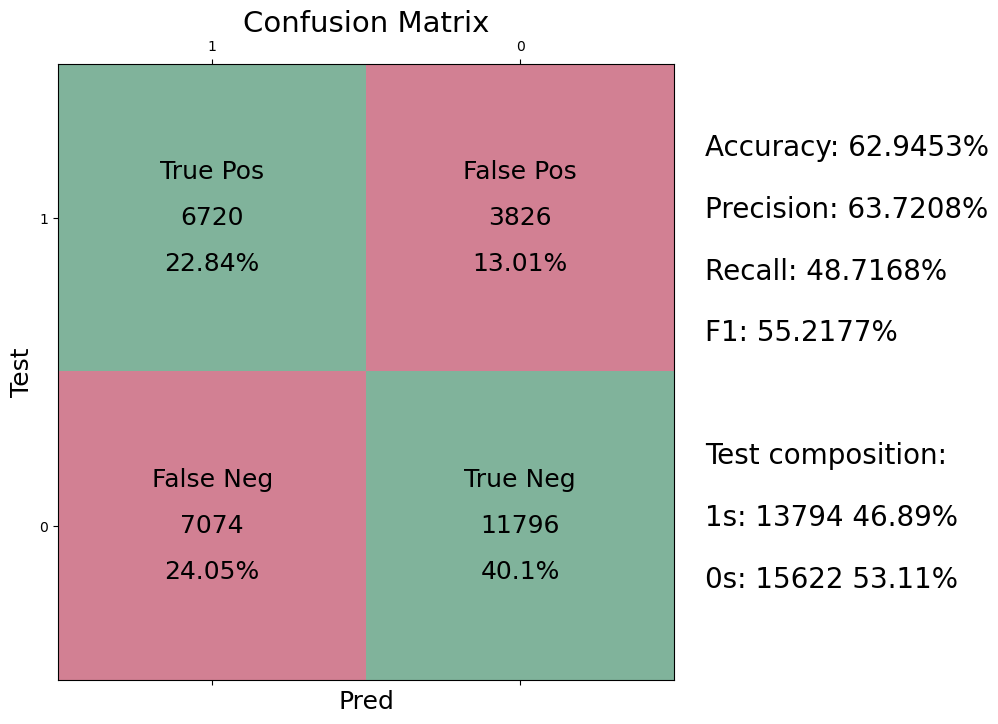

In [14]:
#Testing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#Getting confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_list).ravel()
tot=tn+fp+fn+tp
#Structure of plot
cm=np.array(((1,0),(0,1)))
fig,ax=plt.subplots(figsize=(8,8))
plt.xlabel('Pred', fontsize=18)
plt.ylabel('Test', fontsize=18)
plt.title('Confusion Matrix', fontsize=21)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['1','0'])
ax.set_yticklabels(['1','0'])
ax.matshow(cm,cmap='RdYlGn',alpha=0.5)
#Numeric vals
ax.text(0,0,s=tp,va='center',ha='center',fontsize=18)
ax.text(1,0,s=fp,va='center',ha='center',fontsize=18)
ax.text(0,1,s=fn,va='center',ha='center',fontsize=18)
ax.text(1,1,s=tn,va='center',ha='center',fontsize=18)
#Labels
ax.text(0,-.15,s="True Pos",va='center',ha='center',fontsize=18)
ax.text(1,-.15,s="False Pos",va='center',ha='center',fontsize=18)
ax.text(0,.85,s="False Neg",va='center',ha='center',fontsize=18)
ax.text(1,.85,s="True Neg",va='center',ha='center',fontsize=18)
#Percentages
ax.text(0,.15,s=str(round((tp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,.15,s=str(round((fp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(0,1.15,s=str(round((fn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,1.15,s=str(round((tn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
#Result overview
acc=(tp+tn)/(tp+tn+fp+fn)
pre=(tp)/(tp+fp)
rec=(tp)/(tp+fn)
ax.text(1.6,-.2,"Accuracy: "+str(round((acc)*100 ,4))+'%',fontsize=20)
ax.text(1.6,0,"Precision: "+str(round((pre)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.2,"Recall: "+str(round((rec)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.4,"F1: "+str(round(( 2*((pre*rec)/(pre+rec)) )*100 ,4))+'%',fontsize=20)
c=y_test.value_counts()
print(c)
t1=c[1]
t0=c[0]
ax.text(1.6,.8,"Test composition:",fontsize=20)
ax.text(1.6,1,"1s: "+str(t1)+" "+str(round((t1/(t1+t0))*100 ,2))+'%',fontsize=20)
ax.text(1.6,1.2,"0s: "+str(t0)+" "+str(round((t0/(t1+t0))*100 ,2))+'%',fontsize=20)
del acc,ax,cm,fig,fn,fp,pre,rec,tn,tot,tp
plt.show()